<a href="https://colab.research.google.com/github/cszafariqbal/info-aidTech-task2-Movie-Recommendation-System/blob/main/Task_2_Movie_Recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Movie Recomadation System:


*   Create a machine learning model that can recommend movies to users based on their preferences.


Collaborative filtering requires data on how users have rated movies in order to find similarities between users or items (movies in this case) and make personalized recommendations. Without the ratings data, it's not possible to implement collaborative filtering.
To build a recommendation system based solely on movie information (content-based recommendation)




#Import The Required Library

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#Upload the Dataset into Google Colab

In [2]:
from google.colab import files
uploaded = files.upload()

Saving movies.csv to movies.csv


#Import the dataset Moview Overviews for using Pandas function read_csv()

In [3]:
movies = pd.read_csv("movies.csv")
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama


#Exploratory Data Analysis (EDA)




In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [5]:
movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [6]:
movies.duplicated().sum()

0

In [7]:
movies = movies.drop(columns=['movieId'], axis=1)
movies.head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [8]:
movies.describe(include='all')

,title,genres
count,10329,10329
unique,10327,938
top,War of the Worlds (2005),Drama
freq,2,1385


In [9]:
movies.duplicated().sum()

0

#Text Pre-processing

In [10]:
# movies['title'] = movies['title'].str.extract('([a-zA-Z\s]+)', expand=False)

In [11]:
def cleaning_text(msg):
  stopword = stopwords.words('english')
  #remove common words
  clean_msg = [word for word in msg.split('|') if word not in stopword]
  clean_msg = ' '.join(clean_msg)
  return clean_msg

In [12]:
movies['genres'] = movies.genres.apply(cleaning_text)

In [13]:
movies.head()

,title,genres
0,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,Jumanji (1995),Adventure Children Fantasy
2,Grumpier Old Men (1995),Comedy Romance
3,Waiting to Exhale (1995),Comedy Drama Romance
4,Father of the Bride Part II (1995),Comedy


In [14]:
movies.shape

(10329, 2)

In [15]:
movies.duplicated().sum()

0

In [16]:
movies.drop_duplicates(inplace=True)

In [17]:
movies.duplicated().sum()

0

In [18]:
# combining all selected features
feutre = movies['genres']+' '+movies['title']
# feutre = movies['genres']

In [19]:
feutre

0        Adventure Animation Children Comedy Fantasy To...
1                Adventure Children Fantasy Jumanji (1995)
2                   Comedy Romance Grumpier Old Men (1995)
3            Comedy Drama Romance Waiting to Exhale (1995)
4                Comedy Father of the Bride Part II (1995)
                               ...                        
10324    Animation Children Comedy Cosmic Scrat-tastrop...
10325                    Comedy Le Grand Restaurant (1966)
10326                Comedy A Very Murray Christmas (2015)
10327                           Drama The Big Short (2015)
10328    (no genres listed) Marco Polo: One Hundred Eye...
Length: 10329, dtype: object

#Vectorization/ bag-of-words/Feature Extraction

In [20]:
vect = CountVectorizer()
vect_metric = vect.fit_transform(feutre)
vect_metric.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [21]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
tfidf.fit(vect_metric)
tfidf_metric = tfidf.transform(vect_metric)
tfidf_metric.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#Consine Similarity:
Cosine similarity measures the similarity between two vectors of an inner product space. It is measured by the cosine of the angle between two vectors and determines whether two vectors are pointing in roughly the same direction.
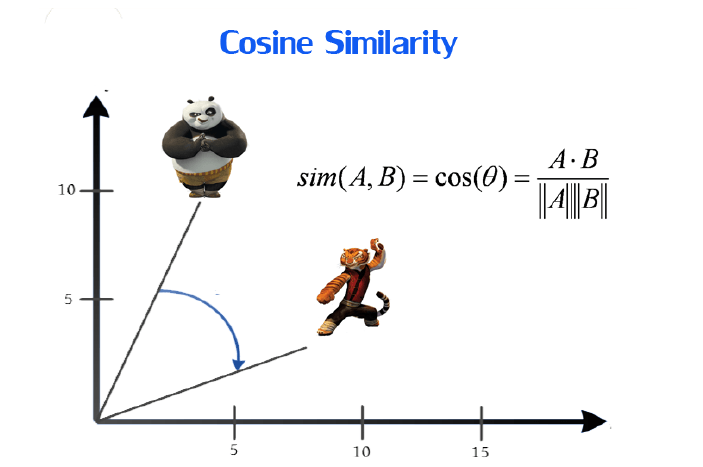

In [22]:
cosin_sim_mat = cosine_similarity(tfidf_metric)
cosin_sim_mat

array([[1.        , 0.35757551, 0.12761652, ..., 0.02041226, 0.        ,
        0.        ],
       [0.35757551, 1.        , 0.11887692, ..., 0.        , 0.        ,
        0.        ],
       [0.12761652, 0.11887692, 1.        , ..., 0.01918499, 0.        ,
        0.        ],
       ...,
       [0.02041226, 0.        , 0.01918499, ..., 1.        , 0.16400297,
        0.08303514],
       [0.        , 0.        , 0.        , ..., 0.16400297, 1.        ,
        0.10730401],
       [0.        , 0.        , 0.        , ..., 0.08303514, 0.10730401,
        1.        ]])

In [23]:
indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()
indices

title
Toy Story (1995)                           0
Jumanji (1995)                             1
Grumpier Old Men (1995)                    2
Waiting to Exhale (1995)                   3
Father of the Bride Part II (1995)         4
                                       ...  
Cosmic Scrat-tastrophe (2015)          10324
Le Grand Restaurant (1966)             10325
A Very Murray Christmas (2015)         10326
The Big Short (2015)                   10327
Marco Polo: One Hundred Eyes (2015)    10328
Length: 10329, dtype: int64

In [24]:
indices.duplicated().sum()

0

In [25]:
indices.index.duplicated().sum()

2

In [26]:
indices

title
Toy Story (1995)                           0
Jumanji (1995)                             1
Grumpier Old Men (1995)                    2
Waiting to Exhale (1995)                   3
Father of the Bride Part II (1995)         4
                                       ...  
Cosmic Scrat-tastrophe (2015)          10324
Le Grand Restaurant (1966)             10325
A Very Murray Christmas (2015)         10326
The Big Short (2015)                   10327
Marco Polo: One Hundred Eyes (2015)    10328
Length: 10329, dtype: int64

In [27]:
indices['Jumanji (1995)']

1

#Create helping function which recomadation similer movies

In [31]:
# function that takes in movies title as input and outputs most similar
def get_recommendation(title, cosin_sim_mat=cosin_sim_mat):
  # get the index of the movie that matches the title
  idx = indices[title]

  #get the pairwise similarity scores of all movies with that movie
  sim_score = list(enumerate(cosin_sim_mat[idx]))

  #Sort the movies based on the similarity score
  sim_score = sorted(sim_score, key=lambda x:x[1], reverse=True)


  # get the scores of the 5 most similar movies
  sim_score = sim_score[1:6]

  # get the movie indices
  movie_indices = [i[0] for i in sim_score]

  # Return the top 10 most similar movies
  return movies['title'].iloc[movie_indices]


get_recommendation('Jumanji (1995)')

0                Toy Story (1995)
6471    Magic in the Water (1995)
1662             Tall Tale (1995)
214                  Gordy (1995)
134                 Casper (1995)
Name: title, dtype: object

In [32]:
get_recommendation('Gordy (1995)')

1                  Jumanji (1995)
0                Toy Story (1995)
6471    Magic in the Water (1995)
1662             Tall Tale (1995)
50          Big Green, The (1995)
Name: title, dtype: object